<a href="https://colab.research.google.com/github/emolinaperez/econometrics_mek/blob/main/Week%2010/R/Week10_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 10: Resampling methods

In [1]:
install.packages("bootstrap")
library(bootstrap)
library(boot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Read your data
data <- read.csv("https://raw.githubusercontent.com/emolinaperez/econometrics_mek/main/Week%2010/data/cps09mar.csv")
head(data)

,age,female,hisp,education,earnings,hours,week,union,uncov,region,race,marital
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,52,0,0,12,146000,45,52,0,0,1,1,1
2,38,0,0,18,50000,45,52,0,0,1,1,1
3,38,0,0,14,32000,40,51,0,0,1,1,1
4,41,1,0,13,47000,40,52,0,0,1,1,1
5,42,0,0,13,161525,50,52,1,0,1,1,1
6,66,1,0,13,33000,40,52,0,0,1,1,5


In [3]:
model_1 <- lm(log(earnings) ~ education, data = data)
summary(model_1)


Call:
lm(formula = log(earnings) ~ education, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9046  -0.3529  -0.0027   0.3754   2.9154 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.04105    0.01433   630.8   <2e-16 ***
education    0.11647    0.00101   115.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6243 on 50740 degrees of freedom
Multiple R-squared:  0.2077,	Adjusted R-squared:  0.2077 
F-statistic: 1.33e+04 on 1 and 50740 DF,  p-value: < 2.2e-16


In [4]:
# Subset data
data_subset <-  subset(data,marital==1 & race==2 & female==1 & union==1 & education>=12)
dim(data_subset)

[1] 18 12

In [5]:
#normal regression
lm1 <- lm(log(earnings) ~ education, data = data_subset)
summary(lm1)


Call:
lm(formula = log(earnings) ~ education, data = data_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45692 -0.33632  0.04244  0.27073  0.47901 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.76315    0.56254  15.578 4.33e-11 ***
education    0.12139    0.03646   3.329  0.00425 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3334 on 16 degrees of freedom
Multiple R-squared:  0.4093,	Adjusted R-squared:  0.3724 
F-statistic: 11.09 on 1 and 16 DF,  p-value: 0.004247


In [6]:
#remove one row randonmly
set.seed(14252)
jk_sample <- sample(1:nrow(data_subset),nrow(data_subset)-1)
length(jk_sample)
nrow(data_subset)

[1] 17

[1] 18

In [7]:
lmjk <- lm(log(earnings) ~ education, data = data_subset[jk_sample,])
summary(lmjk)


Call:
lm(formula = log(earnings) ~ education, data = data_subset[jk_sample, 
    ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45884 -0.36775  0.03596  0.28613  0.48399 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.79098    0.60324   14.57 2.92e-10 ***
education    0.11934    0.03952    3.02  0.00862 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.344 on 15 degrees of freedom
Multiple R-squared:  0.3781,	Adjusted R-squared:  0.3366 
F-statistic: 9.119 on 1 and 15 DF,  p-value: 0.008618


## Regression with jackknife variance estimation

In [8]:
#thetha
regression_func <- function(x,data) {
  model <- lm(log(earnings) ~ education, data = data_subset[as.numeric(x),])
  as.numeric(coef(model)["education"])
}

In [9]:
# Perform jackknife
set.seed(1234)
jackknife_results <- jackknife(1:18,regression_func,data_subset)


In [10]:
# Display jackknife results
print(jackknife_results)
mean(jackknife_results$jack.values)

$jack.se
[1] 0.04334696

$jack.bias
[1] -0.001473714

$jack.values
 [1] 0.12555185 0.13949459 0.11290686 0.10372750 0.11085169 0.11934085
 [7] 0.13877443 0.11698141 0.12071445 0.13150934 0.09950098 0.11737325
[13] 0.13572737 0.12362245 0.12504168 0.12110629 0.12015629 0.12110629

$call
jackknife(x = 1:18, theta = regression_func, data_subset)



[1] 0.1213049

## Bootstrap


In [11]:
#
regression_func <- function(data,x) {
  model <- lm(log(earnings) ~ education, data = data[as.numeric(x),])
  as.numeric(coef(model)["education"])
}

In [12]:
# Bootstrap analysis with 10000 replications
#boot_result <- boot(data = data_subset, statistic = boot_func, R = 10000)
boot_result <- boot(data = data_subset, statistic = regression_func, R = 10000)
boot_result
boot.ci(boot_result, conf=0.95, type="bca")



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_subset, statistic = regression_func, R = 10000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.1213916 -0.001689978  0.04030271

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_result, conf = 0.95, type = "bca")

Intervals : 
Level       BCa          
95%   ( 0.0355,  0.1921 )  
Calculations and Intervals on Original Scale

In [13]:
#Exploring more, bootstrap, step-by-step

# Generating data
set.seed(555555)
n <- 1000
x <- rnorm(n)
y <- x + rnorm(n)

In [14]:
#Models of population and sample
population.data <- as.data.frame(cbind(x, y))
population.model <- lm(y ~ x, population.data)
summary(population.model)


Call:
lm(formula = y ~ x, data = population.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5793 -0.6924 -0.0250  0.6835  3.2312 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02875    0.03179   0.904    0.366    
x            0.99530    0.03141  31.690   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.005 on 998 degrees of freedom
Multiple R-squared:  0.5016,	Adjusted R-squared:  0.5011 
F-statistic:  1004 on 1 and 998 DF,  p-value: < 2.2e-16


In [15]:
#Sampling the data
sample.data <- population.data[sample(nrow(population.data), 20, replace = TRUE), ]
sample.model <- lm(y ~ x, data = sample.data)
summary(sample.model)


Call:
lm(formula = y ~ x, data = sample.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9574 -0.4218 -0.1709  0.6477  1.9443 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.2791     0.2143  -1.302 0.209199    
x             1.1153     0.2568   4.343 0.000392 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9581 on 18 degrees of freedom
Multiple R-squared:  0.5117,	Adjusted R-squared:  0.4846 
F-statistic: 18.86 on 1 and 18 DF,  p-value: 0.0003918


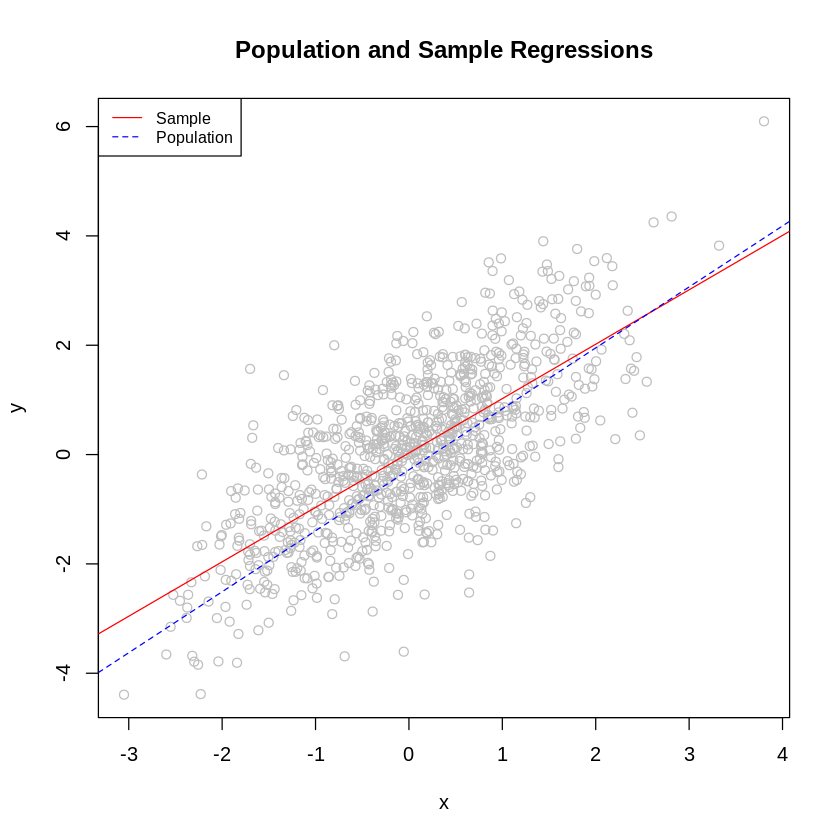

In [16]:
#Plotting the models
plot(y ~ x, col = "gray", main = 'Population and Sample Regressions')
abline(coef(population.model)[1], coef(population.model)[2], col = "red")
abline(coef(sample.model)[1],
       coef(sample.model)[2],
       col = "blue",
       lty = 2)
legend(
  "topleft",
  legend = c("Sample", "Population"),
  col = c("red", "blue"),
  lty = 1:2,
  cex = 0.8)

In [17]:
#The bootstrap regression
sample_coef_intercept <- NULL
sample_coef_x1 <- NULL

for (i in 1:1000) {
  sample_d <- sample.data[sample(1:nrow(sample.data), nrow(sample.data), replace = TRUE), ]
  model_bootstrap <- lm(y ~ x, data = sample_d)
  sample_coef_intercept <- c(sample_coef_intercept, model_bootstrap$coefficients[1])
  sample_coef_x1 <- c(sample_coef_x1, model_bootstrap$coefficients[2])
}

coefs <- rbind(sample_coef_intercept, sample_coef_x1)
coefs


,(Intercept),(Intercept),(Intercept),(Intercept),(Intercept),(Intercept),(Intercept),(Intercept),(Intercept),(Intercept),⋯,(Intercept),(Intercept),(Intercept),(Intercept),(Intercept),(Intercept),(Intercept),(Intercept),(Intercept),(Intercept)
sample_coef_intercept,0.002781697,-0.5754793,-0.5581807,-0.3790858,-0.04471602,-0.122435,0.009408536,-0.1949627,-0.3027081,-0.1355797,⋯,-0.3799201,-0.3047965,-0.4345514,-0.003426604,-0.1083492,-0.1311697,-0.3824231,-0.1801605,-0.3015687,0.09391065
sample_coef_x1,1.329446127,0.9467329,0.8351886,1.1762752,1.29307635,1.286568,1.538146491,1.3463792,1.2512037,1.4567362,⋯,1.0830991,1.2041271,1.1722030,1.267751569,1.0681024,0.8382773,1.0916082,1.4435696,1.1425014,1.37564925


In [18]:
# Combining the results in a table
means.boot = c(mean(sample_coef_intercept), mean(sample_coef_x1))
knitr::kable(round(
  cbind(
    population = coef(summary(population.model))[, 1],
    sample = coef(summary(sample.model))[, 1],
    bootstrap = means.boot),4),
  "simple", caption = "Coefficients in different models")



Table: Coefficients in different models

               population    sample   bootstrap
------------  -----------  --------  ----------
(Intercept)        0.0288   -0.2791     -0.2798
x                  0.9953    1.1153      1.1149

In [19]:
confint(population.model)

,2.5 %,97.5 %
(Intercept),-0.03362969,0.09113787
x,0.93366396,1.05692791


In [20]:
confint(sample.model)

,2.5 %,97.5 %
(Intercept),-0.7293022,0.1711166
x,0.5757890,1.6548040


In [21]:
a <-cbind(
    quantile(sample_coef_intercept, prob = 0.025),
    quantile(sample_coef_intercept, prob = 0.975))
b <-cbind(
     quantile(sample_coef_x1, prob = 0.025),
     quantile(sample_coef_x1, prob = 0.975))

c <-
  round(cbind(
    population = confint(population.model),
    sample = confint(sample.model),
    boot = rbind(a, b)), 4)
colnames(c) <- c("2.5 %", "97.5 %",
                 "2.5 %", "97.5 %",
                 "2.5 %", "97.5 %")
knitr::kable(rbind(
  c('population',
    'population',
    'sample',
    'sample',
    'bootstrap',
    'bootstrap'),c))



|            |2.5 %      |97.5 %     |2.5 %   |97.5 % |2.5 %     |97.5 %    |
|:-----------|:----------|:----------|:-------|:------|:---------|:---------|
|            |population |population |sample  |sample |bootstrap |bootstrap |
|(Intercept) |-0.0336    |0.0911     |-0.7293 |0.1711 |-0.6889   |0.1226    |
|x           |0.9337     |1.0569     |0.5758  |1.6548 |0.6402    |1.6201    |

In [22]:
#Predicting on new data
new.data <- seq(min(x), max(x), by = 0.05)
conf_interval <-
  predict(
    sample.model,
    newdata = data.frame(x = new.data),
    interval = "confidence",
    level = 0.95)

NULL

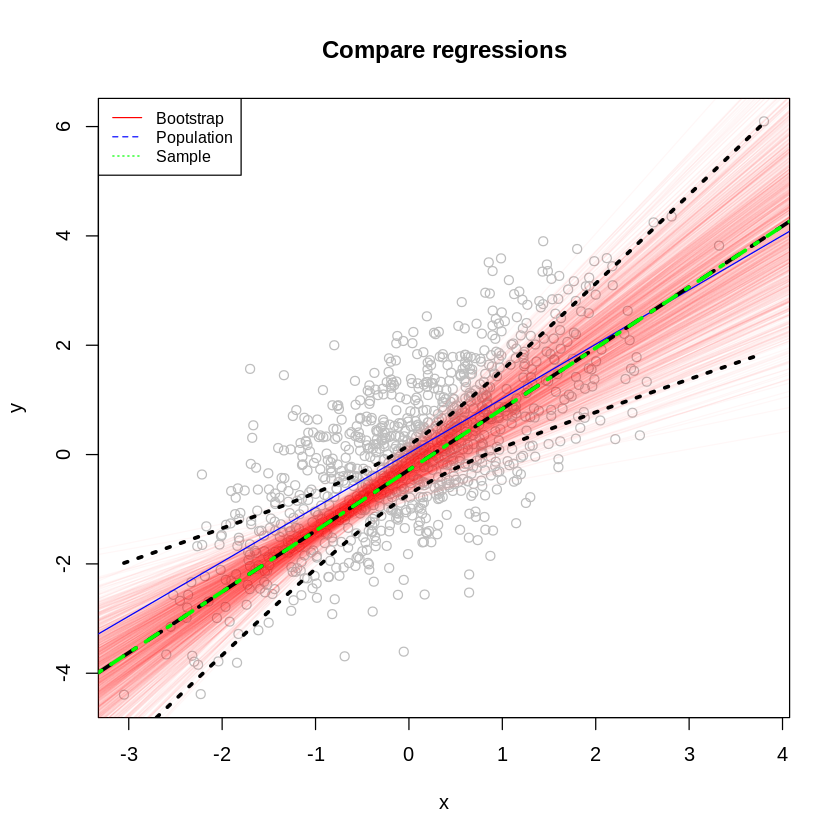

In [23]:
#Plotting the results on the project step-by-spet
plot(
  y ~ x,
  col = "gray",
  xlab = "x",
  ylab = "y",
  main = "Compare regressions")
apply(coefs, 2, abline, col = rgb(1, 0, 0, 0.03))
abline(coef(population.model)[1], coef(population.model)[2], col = "blue")
abline(coef(sample.model)[1],
       coef(sample.model)[2],
       col = "black",
       lty = 2, lwd=3)
abline(mean(sample_coef_intercept),
       mean(sample_coef_x1),
       col = "green",
       lty = 4, lwd=3)
lines(new.data, conf_interval[, 2], col = "black", lty = 3, lwd=3)
lines(new.data, conf_interval[, 3], col = "black", lty = 3, lwd=3)
legend("topleft",
       legend = c("Bootstrap", "Population", 'Sample'),
       col = c("red", "blue", 'green'),
       lty = 1:3,
       cex = 0.8)